# <span style="color: blue;">Model creation and execution with Count Vectorizer with Lemmetizer Applied and Logistic Regression :-</span>

# <span style="color: green;">Required Imports to run the model</span>

In [39]:
from IPython.display import HTML
HTML('''<script>
    code_show_err=false; 
    function code_toggle_err() {
     if (code_show_err){
     $('div.output_stderr').hide();
     } else {
     $('div.output_stderr').show();
     }
     code_show_err = !code_show_err
    } 
    $( document ).ready(code_toggle_err);
    </script>
    To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [40]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [42]:
pd.set_option('display.max_colwidth', None)

# <span style="color: green;">Helper methods imported from helper function file</span>

In [43]:
#from ipynb.fs.full.function import stemmer
#from ipynb.fs.full.function import lemmetizer
from ipynb.fs.full.function import print_model_data
from ipynb.fs.full.function import model_execute
from ipynb.fs.full.function import stemm_data
from ipynb.fs.full.function import lemm_data
from ipynb.fs.full.function import class_balancer
from ipynb.fs.full.function import bar_plot
from ipynb.fs.full.function import get_data
from ipynb.fs.full.function import remove_punctuation_func
from ipynb.fs.full.function import data_cleanup_for_balancer_lemmetizer
from ipynb.fs.full.function import get_live_tweets

# <span style="color: green;">Pipe created for Count Vectorizer and Logistic Regression model</span>

In [44]:
cvect_lr_pipe=Pipeline([('transformer', CountVectorizer(stop_words='english')),
                       ('model', LogisticRegression(max_iter=1000))])

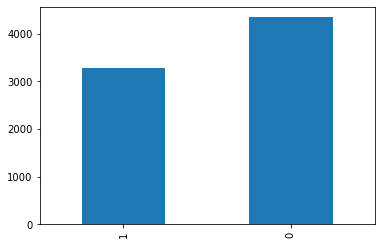

In [45]:
X,y=get_data()
X
bar_plot(y)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X['lemmetizer'],y,test_size=0.3,random_state=42)

# <span style="color: green;">Run the model with raw data loaded</span>

,model,best_params,best_score,best_time,accuracy_score,roc_auc_score
0,Count Vectorizer and Logistic Regression Lemmetizer,"{'memory': None, 'steps': [('transformer', CountVectorizer(stop_words='english')), ('model', LogisticRegression(max_iter=1000))], 'verbose': False, 'transformer': CountVectorizer(stop_words='english'), 'model': LogisticRegression(max_iter=1000), 'transformer__analyzer': 'word', 'transformer__binary': False, 'transformer__decode_error': 'strict', 'transformer__dtype': <class 'numpy.int64'>, 'transformer__encoding': 'utf-8', 'transformer__input': 'content', 'transformer__lowercase': True, 'transformer__max_df': 1.0, 'transformer__max_features': None, 'transformer__min_df': 1, 'transformer__ngram_range': (1, 1), 'transformer__preprocessor': None, 'transformer__stop_words': 'english', 'transformer__strip_accents': None, 'transformer__token_pattern': '(?u)\b\w\w+\b', 'transformer__tokenizer': None, 'transformer__vocabulary': None, 'model__C': 1.0, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 1000, 'model__multi_class': 'auto', 'model__n_jobs': None, 'model__penalty': 'l2', 'model__random_state': None, 'model__solver': 'lbfgs', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}",0.799037,0.216492,0.799037,0.785093
1,Count Vectorizer and Logistic Regression Lemmetizer,"{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}",0.974868,0.242936,0.974868,0.974868
2,Count Vectorizer and Logistic Regression Lemmetizer,"{'cv': None, 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 1000, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(max_iter=1000), 'n_jobs': None, 'param_grid': {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}",0.996197,11.377976,0.996197,0.996197
3,Count Vectorizer and Logistic Regression Lemmetizer,"{'memory': None, 'steps': [('transformer', CountVectorizer(stop_words='english')), ('model', LogisticRegression(max_iter=1000))], 'verbose': False, 'transformer': CountVectorizer(stop_words='english'), 'model': LogisticRegression(max_iter=1000), 'transformer__analyzer': 'word', 'transformer__binary': False, 'transformer__decode_error': 'strict', 'transformer__dtype': <class 'numpy.int64'>, 'transformer__encoding': 'utf-8', 'transformer__input': 'content', 'transformer__lowercase': True, 'transformer__max_df': 1.0, 'transformer__max_features': None, 'transformer__min_df': 1, 'transformer__ngram_range': (1, 1), 'transformer__preprocessor': None, 'transformer__stop_words': 'english', 'transformer__strip_accents': None, 'transformer__token_pattern': '(?u)\b\w\w+\b', 'transformer__tokenizer': None, 'transformer__vocabulary': None, 'model__C': 1.0, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 1000, 'model__multi_class': 'auto', 'model__n_jobs': None, 'model__penalty': 'l2', 'model__random_state': None, 'model__solver': 'lbfgs', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}",0.799037,0.214706,0.799037,0.785093
4,Count Vectorizer and Logistic Regression Lemmetizer,"{'C': 1.0, 'class_weight': None, '

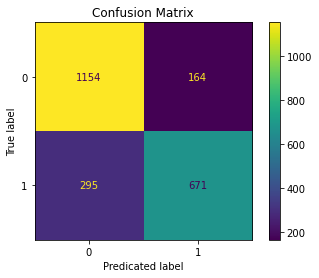

In [47]:
df = print_model_data('Count Vectorizer and Logistic Regression Lemmetizer',
                 model_execute(cvect_lr_pipe,X_train,y_train),
                 cvect_lr_pipe,
                 X_train,
                 X_test,
                 y_train,
                 y_test,
                 False)
df

In [48]:
X_train,X_test,y_train,y_test=data_cleanup_for_balancer_lemmetizer(X)

In [49]:
Xb_train, yb_train = class_balancer(X_train,y_train)

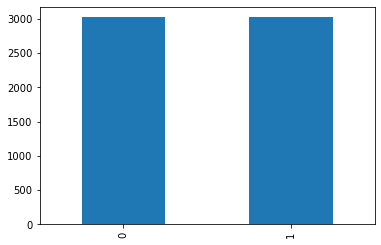

In [50]:
bar_plot(yb_train)

In [51]:
Xb_test, yb_test = class_balancer(X_train,y_train)

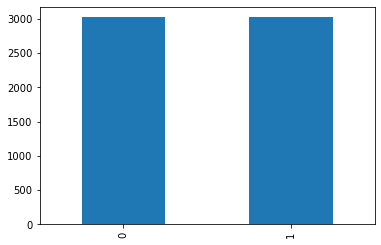

In [52]:
bar_plot(yb_test)

/Users/achandrasekhar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,best_params,best_score,best_time,accuracy_score,roc_auc_score
0,Count Vectorizer and Logistic Regression Lemmetizer,"{'memory': None, 'steps': [('transformer', CountVectorizer(stop_words='english')), ('model', LogisticRegression(max_iter=1000))], 'verbose': False, 'transformer': CountVectorizer(stop_words='english'), 'model': LogisticRegression(max_iter=1000), 'transformer__analyzer': 'word', 'transformer__binary': False, 'transformer__decode_error': 'strict', 'transformer__dtype': <class 'numpy.int64'>, 'transformer__encoding': 'utf-8', 'transformer__input': 'content', 'transformer__lowercase': True, 'transformer__max_df': 1.0, 'transformer__max_features': None, 'transformer__min_df': 1, 'transformer__ngram_range': (1, 1), 'transformer__preprocessor': None, 'transformer__stop_words': 'english', 'transformer__strip_accents': None, 'transformer__token_pattern': '(?u)\b\w\w+\b', 'transformer__tokenizer': None, 'transformer__vocabulary': None, 'model__C': 1.0, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 1000, 'model__multi_class': 'auto', 'model__n_jobs': None, 'model__penalty': 'l2', 'model__random_state': None, 'model__solver': 'lbfgs', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}",0.799037,0.216492,0.799037,0.785093
1,Count Vectorizer and Logistic Regression Lemmetizer,"{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}",0.974868,0.242936,0.974868,0.974868
2,Count Vectorizer and Logistic Regression Lemmetizer,"{'cv': None, 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 1000, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(max_iter=1000), 'n_jobs': None, 'param_grid': {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}",0.996197,11.377976,0.996197,0.996197
3,Count Vectorizer and Logistic Regression Lemmetizer,"{'memory': None, 'steps': [('transformer', CountVectorizer(stop_words='english')), ('model', LogisticRegression(max_iter=1000))], 'verbose': False, 'transformer': CountVectorizer(stop_words='english'), 'model': LogisticRegression(max_iter=1000), 'transformer__analyzer': 'word', 'transformer__binary': False, 'transformer__decode_error': 'strict', 'transformer__dtype': <class 'numpy.int64'>, 'transformer__encoding': 'utf-8', 'transformer__input': 'content', 'transformer__lowercase': True, 'transformer__max_df': 1.0, 'transformer__max_features': None, 'transformer__min_df': 1, 'transformer__ngram_range': (1, 1), 'transformer__preprocessor': None, 'transformer__stop_words': 'english', 'transformer__strip_accents': None, 'transformer__token_pattern': '(?u)\b\w\w+\b', 'transformer__tokenizer': None, 'transformer__vocabulary': None, 'model__C': 1.0, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 1000, 'model__multi_class': 'auto', 'model__n_jobs': None, 'model__penalty': 'l2', 'model__random_state': None, 'model__solver': 'lbfgs', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}",0.799037,0.214706,0.799037,0.785093
4,Count Vectorizer and Logistic Regression Lemmetizer,"{'C': 1.0, 'class_weight': None, '

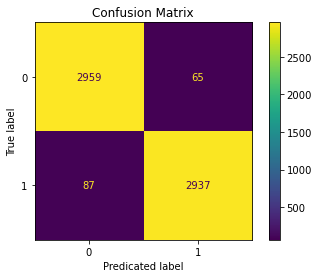

In [53]:
lr = LogisticRegression()
df = print_model_data('Count Vectorizer and Logistic Regression Lemmetizer',
                 model_execute(lr,Xb_train,yb_train),
                 lr,
                 Xb_train,
                 Xb_test,
                 yb_train,
                 yb_test,
                 False)
df

In [54]:
max_iter=[1,10,1000]
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
params = dict(solver=solvers,penalty=penalty,C=c_values)

In [55]:
lr=LogisticRegression(max_iter=1000)
grid = GridSearchCV(lr,param_grid=params)

,model,best_params,best_score,best_time,accuracy_score,roc_auc_score
0,Count Vectorizer and Logistic Regression Lemmetizer,"{'memory': None, 'steps': [('transformer', CountVectorizer(stop_words='english')), ('model', LogisticRegression(max_iter=1000))], 'verbose': False, 'transformer': CountVectorizer(stop_words='english'), 'model': LogisticRegression(max_iter=1000), 'transformer__analyzer': 'word', 'transformer__binary': False, 'transformer__decode_error': 'strict', 'transformer__dtype': <class 'numpy.int64'>, 'transformer__encoding': 'utf-8', 'transformer__input': 'content', 'transformer__lowercase': True, 'transformer__max_df': 1.0, 'transformer__max_features': None, 'transformer__min_df': 1, 'transformer__ngram_range': (1, 1), 'transformer__preprocessor': None, 'transformer__stop_words': 'english', 'transformer__strip_accents': None, 'transformer__token_pattern': '(?u)\b\w\w+\b', 'transformer__tokenizer': None, 'transformer__vocabulary': None, 'model__C': 1.0, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 1000, 'model__multi_class': 'auto', 'model__n_jobs': None, 'model__penalty': 'l2', 'model__random_state': None, 'model__solver': 'lbfgs', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}",0.799037,0.216492,0.799037,0.785093
1,Count Vectorizer and Logistic Regression Lemmetizer,"{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}",0.974868,0.242936,0.974868,0.974868
2,Count Vectorizer and Logistic Regression Lemmetizer,"{'cv': None, 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 1000, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(max_iter=1000), 'n_jobs': None, 'param_grid': {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}",0.996197,11.377976,0.996197,0.996197
3,Count Vectorizer and Logistic Regression Lemmetizer,"{'memory': None, 'steps': [('transformer', CountVectorizer(stop_words='english')), ('model', LogisticRegression(max_iter=1000))], 'verbose': False, 'transformer': CountVectorizer(stop_words='english'), 'model': LogisticRegression(max_iter=1000), 'transformer__analyzer': 'word', 'transformer__binary': False, 'transformer__decode_error': 'strict', 'transformer__dtype': <class 'numpy.int64'>, 'transformer__encoding': 'utf-8', 'transformer__input': 'content', 'transformer__lowercase': True, 'transformer__max_df': 1.0, 'transformer__max_features': None, 'transformer__min_df': 1, 'transformer__ngram_range': (1, 1), 'transformer__preprocessor': None, 'transformer__stop_words': 'english', 'transformer__strip_accents': None, 'transformer__token_pattern': '(?u)\b\w\w+\b', 'transformer__tokenizer': None, 'transformer__vocabulary': None, 'model__C': 1.0, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 1000, 'model__multi_class': 'auto', 'model__n_jobs': None, 'model__penalty': 'l2', 'model__random_state': None, 'model__solver': 'lbfgs', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}",0.799037,0.214706,0.799037,0.785093
4,Count Vectorizer and Logistic Regression Lemmetizer,"{'C': 1.0, 'class_weight': None, '

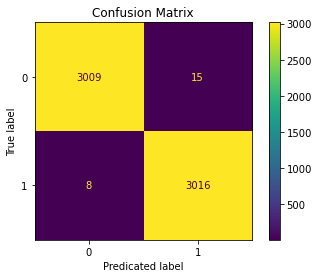

In [56]:
df = print_model_data('Count Vectorizer and Logistic Regression Lemmetizer',
                 model_execute(grid,Xb_train,yb_train),
                 grid,
                 Xb_train,
                 Xb_test,
                 yb_train,
                 yb_test,
                 False)
df

# <span style="color: green;">Predict on live Tweet Data of last 15 mins capped to 15 tweets</span>

In [58]:
live_tweets=get_live_tweets()
live_tweets['pred'] = cvect_lr_pipe.predict(live_tweets['tweets'])
live_tweets


,tweets,pred
0,"RT @SA__moment: The original GBS thread ""the World Trade Center is on fire"" from September 11th, 2001 has been preserved. If you are too yo…",0
1,Fire which that kept us apart. I https://t.co/73CxuhIpR3,0
2,RT @HotshotWake: Idaho: Burn Ops on the Moose Fire. Shoutout Snake River Hotshots. #moosefire #idaho #wildfire https://t.co/KIgxpQODbo,1
3,Now Playing A World Consumed In Fire by Imprecation https://t.co/Uf3LvjIX61,0
4,RT @TansuYegen: Awesome drawing with fire on wood👏\nArtist: @Alexpeter_idoko https://t.co/XS8uTp04WJ,0
5,Design quite with paper buy fire step serve. ['https://t.co/WmYcgvvltL'],0
6,RT @barstoolsports: Nebraska fans when they fire Scott Frost https://t.co/rRA3vQeDyD,0
7,RT @AdamForColorado: @RonFilipkowski What an embarrassment. If you’d like to help fire Lauren Boebert and send me to Washington instead aft…,0
8,@Melissa63825561 Design quite with paper buy fire step serve.,0
9,RT @haecful: this is a fancam from the front and back view when haechan makes a wave dance on the fire alarm. oh the great performance 🌟 ht…,0
